In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cdms2
import cdutil
from scipy.interpolate import interp1d

['LAT', 'LON', 'TIME']
['SWDN', 'LWDN_MOD', 'SWDN_MOD', 'LWDN']


/Users/d3x345/miniconda2/lib/python2.7/site-packages/numpy/ma/core.py:3174: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/Users/d3x345/miniconda2/lib/python2.7/site-packages/numpy/ma/core.py:3206: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]


['lat', 'lon', 'time']
['sfc_sw_down_clr_mon', 'sfc_lw_up_all_mon', 'sfc_net_tot_clr_mon', 'sfc_net_lw_clr_mon', 'sfc_lw_down_all_mon', 'sfc_net_tot_all_mon', 'sfc_sw_up_clr_mon', 'sfc_lw_up_clr_mon', 'sfc_lw_down_clr_mon', 'sfc_net_sw_all_mon', 'sfc_sw_up_all_mon', 'sfc_sw_down_all_mon', 'sfc_net_lw_all_mon', 'sfc_net_sw_clr_mon']
lat2 (180,)
data2 (180,)
class <class 'cdms2.tvariable.TransientVariable'>
lat2.size 180
lat1.size 94


KeyError: 'Unrecognized key "axes.color_cycle" for group "axes" and name "color_cycle"'

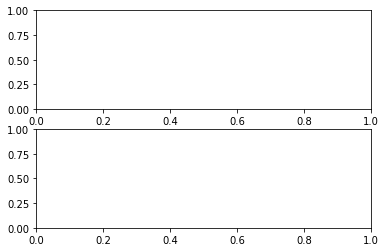

In [2]:
f = cdms2.open("/Users/d3x345/Desktop/NetCDF_files/COREV2_ncar_rad.15JUNE2009.nc");
varlist = f.listvariables();
dims = f.listdimension();
print dims;
print varlist;

U =  f('SWDN');
U = cdutil.averager(U, axis='x');
U = cdutil.averager(U, axis='0',weights='equal');
data1 = U[...]
lat1 = f['LAT'];
#print "lat1", lat1.shape;
#print "data ", data1.shape;
#s.plot(U);
#raw_input("Press Enter to continue...")

g = cdms2.open("/Users/d3x345/Desktop/NetCDF_files/CERES_EBAF-Surface_Ed2.8_Subset_200003-201409.nc");
varlist = g.listvariables();
dims = g.listdimension();
print dims;
print varlist;

V =  g('sfc_sw_down_all_mon');
V = cdutil.averager(V, axis='x');
V = cdutil.averager(V, axis='0',weights='equal');
data2 = V[...]
lat2 = g['lat'];
print "lat2", lat2.shape;
print "data2", data2.shape;


plt.rc('lines', linewidth=4)
fig, (ax0, ax1)  = plt.subplots(nrows=2)
# You can get some information about the variables by
#lat2.info()
#data2.info()
# You can also find out what class the object x or y belong to
print "class", data2.__class__
print "lat2.size", np.size(lat2)
print "lat1.size", np.size(lat1)


plt.rc('axes', color_cycle=['r', 'g', 'b', 'y'])
x2 = np.array(lat2);
y2 = np.array(data2);
x1 = np.array(lat1)
y1 = np.array(data1)
l1, = ax0.plot(x1, y1,label='CORE.v2')
l2, = ax0.plot(x2, y2,label='EBAFS-Sfc')
ax0.legend(handles=[l1,l2])
#ax0.plot(lat2,data2)
ax0.set_title('Downward Shortwave')
if np.size(lat2) > np.size(lat1):
    xh = x2;
    y1 = np.interp(xh, x1, y1)
else:
    xh = x1;
    y2 = np.interp(xh, x2, y2)
print "regrid data2.size", np.size(y2)
print "regrid data1.size", np.size(y1)
dy = np.array(y2-y1);
ax1.plot(xh, dy);

plt.show()
#s.plot(U,xy);
#s.plot(V,xy);
#lat2;
#data2;
#s.plot(lat1,data1,xy,long_name='test');
#s.plot(lat2,data2,xy2,long_name='test');

In [3]:
# get the data, remap the model to the EBAF resolution
g = cdms2.open("/Users/d3x345/Desktop/NetCDF_files/CERES_EBAF-Surface_Ed2.8_Subset_200003-201409.nc");
varlist = g.listvariables();
dims = g.listdimension();
#print dims;
#print varlist;

V =  g('sfc_sw_down_clr_mon')
cdutil.setTimeBoundsMonthly(V)
print "xx", V.info()
# the next lines useful for annual averages
#V = cdutil.YEAR(V)[1:-1,...]  # throw out partial years
V = cdutil.JJA(V)
V = cdutil.averager(V, axis='0',weights='equal'); # time average
print "YY", V.info()
#V.info()
print "range", V.min(), V.max()
lat = g['lat']
#print "lat info", lat.info()
lon = g['lon']
#time = g['time']
#print time;
#data.info()


fname = "/Users/d3x345/Desktop/NetCDF_files/vd05_ANN_climo.nc"
fname = "/Users/d3x345/Desktop/NetCDF_files/vd05_JJA_climo.nc"
g2 = cdms2.open(fname);
varlist = g2.listvariables();
dims = g2.listdimension();
#print dims;
#print varlist;

V2 =  g2('FSDSC')
V2 = V2[0,...]
#print "V2 info", V2.info()
LANDFRAC2 = g2('LANDFRAC')
LANDFRAC2 = LANDFRAC2[0,...]
print "V2 size", V2.size, V.size
if V2.size < V.size :
    outgrid = V.getGrid()
    print "outgrid", outgrid
    rt = 'esmf'
    rm = 'conservative'
    print "V2.info", V2.info()
    V2a = V2.regrid(outgrid, regridTool=rt, regridMethod=rm)
    LF2a = LANDFRAC2.regrid(outgrid, regridTool=rt, regridMethod=rm)
    print "LF2a range", LF2a.min(), LF2a.max()

#    V2a.info()
    print "V2a range", V2a.min(), V2a.max()
#V2.info()
print "V2 range", V2.min(), V2.max()
# if V2av and V2a_av differ it suggests that the averager is using a different weighting value
print "V2av=", cdutil.averager(V2,axis="xy",weights="weighted")
print "V2a_av=", cdutil.averager(V2a,axis="xy",weights="weighted")
lat2 = g2['lat']
#lat2.info()
#lat2.shape
#lat2 = tuple(lat2)
lon2 = g2['lon']
#lon2.info()
#lon2 = tuple(lon2)
print "LANDFRAC2av=", cdutil.averager(LANDFRAC2,axis="xy",weights="weighted")
print "LANDFRAC2a_av=", cdutil.averager(LF2a,axis="xy",weights="weighted")

DV = V2a - V
print "DV_av=", cdutil.averager(DV,axis="xy",weights="weighted")
print "DV.shape", DV.shape
print "LANDFRAC2.shape", LANDFRAC2.shape
print "LF2a.shape", LF2a.shape

#DDV = DV - DVF

xx*** Description of Slab sfc_sw_down_clr_mon ***
id: sfc_sw_down_clr_mon
shape: (175, 180, 360)
filename: 
missing_value: -999.0
comments: 
grid_name: <None>
grid_type: generic
time_statistic: 
long_name: Surface Shortwave Flux Down, Monthly Means, Clear-Sky conditions
units: W m-2
CF_name: surface_downwelling_shortwave_flux_in_air_assuming_clear_sky
tileIndex: None
standard_name: Surface Shortwave Flux Down - Clear-Sky
IPCC_name: none
valid_min:       0.00000
valid_max:       520.000
Grid has Python id 0x128eed0d0.
Gridtype: generic
Grid shape: (180, 360)
Order: yx
** Dimension 1 **
   id: time
   Designated a time axis.
   units:  days since 2000-03-01 00:00:00
   Length: 175
   First:  14
   Last:   5311
   Other axis attributes:
      realtopology: linear
      delta_t: 0000-00-01 00:00:00
      long_name: time
      calendar: gregorian
      axis: T
   Python id:  0x128ed0e50
** Dimension 2 **
   id: lat
   Designated a latitude axis.
   units:  degrees_north
   Length: 180
   Fi

LF2a_av= 0.29174513795154


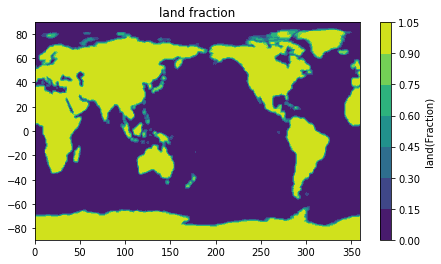

In [4]:
plt.figure(figsize=(16, 4))
#fig, ax = plt.subplots()
plt.subplot(121)
plt.title("land fraction")
cs = plt.contourf(lon, lat, LF2a)
# add colorbar.
cbar = plt.colorbar(cs)
cbar.set_label('land(Fraction)')
print "LF2a_av=", cdutil.averager(LF2a,axis="xy",weights="weighted")
plt.show()

llist False True
land zero (180, 360)
DVM (model-obs) = 3.70
[-60.0, -50.0, -40.0, -30.0, -20.0, -10.0, 0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0]


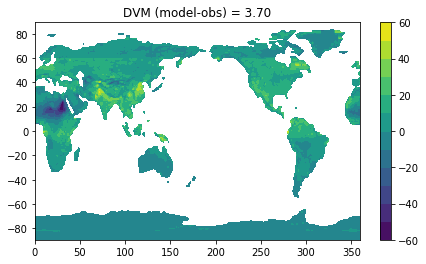

In [5]:
#LANDFRAC.info()
#print "LANDFRAC2 =", cdutil.averager(LANDFRAC2,axis="xy",weights="weighted")
#print "masked LANDFRAC2 =", cdutil.averager(LFM,axis="xy",weights="weighted")
#print "dir(LF)", dir(LANDFRAC)
#print "xx", LANDFRAC2.info()
llist = (LF2a[:] < 0.5)
print "llist",llist[0,0],llist[-1,-1]
print "land zero", llist.shape
LFM = LF2a[:]
DVM = DV
DVM.mask = llist # add a mask for land points

plt.figure(figsize=(16, 4))
#fig, ax = plt.subplots()
plt.subplot(121)
gavg = cdutil.averager(DVM,axis="xy",weights="weighted")
titl = "DVM (model-obs) = %.2f" % gavg
print titl
plt.title(titl)
clevs =  np.arange(-60.,70., 10).tolist()
print clevs
cs = plt.contourf(lon, lat, DVM, clevs)
# add colorbar.
cbar = plt.colorbar(cs)
plt.show()
#print "masked DV =", cdutil.averager(DVM,axis="xy",weights="weighted")



clevs [100.0, 110.0, 120.0, 130.0, 140.0, 150.0, 160.0, 170.0, 180.0, 190.0, 200.0, 210.0, 220.0, 230.0, 240.0, 250.0, 260.0, 270.0, 280.0, 290.0, 300.0, 310.0, 320.0, 330.0]


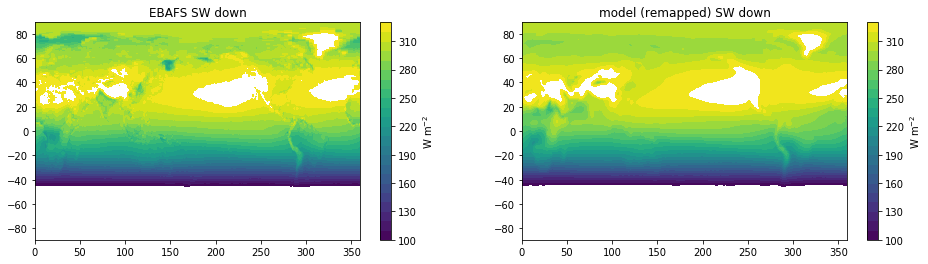

In [6]:
clevs =  np.arange(100.,340., 10).tolist()
print "clevs", clevs
plt.figure(figsize=(16, 4))
#fig, ax = plt.subplots()
plt.subplot(121)
plt.title("EBAFS SW down")
cs = plt.contourf(lon, lat, V, clevs)
cmap = plt.cm.get_cmap("nipy_spectral")
colors = cmap(np.linspace(0,1,len(clevs)))
# add colorbar.
cbar = plt.colorbar(cs)
cbar.set_label('W m$^{-2}$')
plt.subplot(122)
plt.title("model (remapped) SW down")
cs = plt.contourf(lon, lat, V2a, clevs)
cmap = plt.cm.get_cmap("nipy_spectral")
colors = cmap(np.linspace(0,1,len(clevs)))
# add colorbar.
cbar = plt.colorbar(cs)
cbar.set_label('W m$^{-2}$')

plt.show()




clevs [-65.3739369046861, -55.373936904686104, -45.373936904686104, -35.373936904686104, -25.373936904686104, -15.373936904686104, -5.373936904686104, 4.626063095313896, 14.626063095313896, 24.626063095313896, 34.626063095313896, 44.626063095313896, 54.626063095313896]


NameError: name 'DVF' is not defined

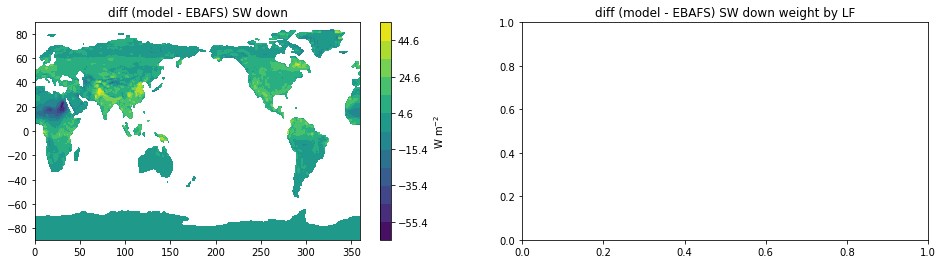

In [7]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
plt.title("diff (model - EBAFS) SW down")
clevs =  np.arange(DV.min(),DV.max(), 10).tolist()
print "clevs", clevs
cs = plt.contourf(lon, lat, DV, clevs)
cmap = plt.cm.get_cmap("nipy_spectral")
colors = cmap(np.linspace(0,1,len(clevs)))
# add colorbar
cbar = plt.colorbar(cs)
cbar.set_label('W m$^{-2}$')
plt.subplot(122)
plt.title("diff (model - EBAFS) SW down weight by LF")
cs = plt.contourf(lon, lat, DVF, clevs)
cmap = plt.cm.get_cmap("nipy_spectral")
colors = cmap(np.linspace(0,1,len(clevs)))
# add colorbar.
cbar = plt.colorbar(cs)
cbar.set_label('W m$^{-2}$')
plt.show()

plt.figure(figsize=(16, 4))
plt.subplot(121)
clevs =  np.arange(DDV.min(),DDV.max(), 2).tolist()
cs = plt.contourf(lon, lat, DDV, clevs)
cmap = plt.cm.get_cmap("nipy_spectral")
colors = cmap(np.linspace(0,1,len(clevs)))
# add colorbar.
cbar = plt.colorbar(cs)
cbar.set_label('W m$^{-2}$')


In [ ]:
import pjr

pjr.fib(3)